## **NAIROBI STOCK EXCHANGE TIME SERIES ANALYSIS**

##### IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


#### DATA CLEANING AND MERGING

In [2]:
# load the 2023 dataset

df_1 = pd.read_csv('Kenya Nairobi Securities Exchange (NSE) All Stocks Prices 2023-2024/NSE_data_all_stocks_2023.csv')

df_1.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,03-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.50,10.50,10.50,-,-,"1,900.00",-
1,03-Jan-2023,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,-,-,-,-
2,03-Jan-2023,KAPC,Kapchorua Tea Kenya Plc,207.00,280.00,115.75,115.75,115.75,113.25,2.5,2.21%,100.00,-
3,03-Jan-2023,LIMT,Limuru Tea Plc,365.00,380.00,420.00,420.00,420.00,420.00,-,-,-,-
4,03-Jan-2023,SASN,Sasini Plc,15.10,22.00,22.00,22.50,22.45,22.45,-,-,"6,900.00",-


In [3]:
# load the 2024 dataset

df_2 = pd.read_csv('Kenya Nairobi Securities Exchange (NSE) All Stocks Prices 2023-2024/NSE_data_all_stocks_2024.csv')

df_2.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2-Jan-24,EGAD,Eaagads Ltd,10.35,14.5,12.8,12.8,12.8,13.95,-1.15,8.24%,100,-
1,2-Jan-24,KUKZ,Kakuzi Plc,342,440,385,385,385,385,-,-,-,-
2,2-Jan-24,KAPC,Kapchorua Tea Kenya Plc,207,280,215,215,215,215,-,-,-,-
3,2-Jan-24,LIMT,Limuru Tea Plc,365,380,380,380,380,380,-,-,-,-
4,2-Jan-24,SASN,Sasini Plc,15.1,22,20,20,20,20,-,-,"3,300.00",-


In [4]:
# merge 2023 and 2024 dataframes
merged_df = pd.concat([df_1, df_2]).reset_index(drop=True)

merged_df

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,03-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.50,10.50,10.50,-,-,"1,900.00",-
1,03-Jan-2023,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,-,-,-,-
2,03-Jan-2023,KAPC,Kapchorua Tea Kenya Plc,207.00,280.00,115.75,115.75,115.75,113.25,2.5,2.21%,100.00,-
3,03-Jan-2023,LIMT,Limuru Tea Plc,365.00,380.00,420.00,420.00,420.00,420.00,-,-,-,-
4,03-Jan-2023,SASN,Sasini Plc,15.10,22.00,22.00,22.50,22.45,22.45,-,-,"6,900.00",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35388,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",22.56,0.67%,-,-
35389,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.36,0.29%,-,-
35390,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",13.54,1.24%,-,-
35391,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",24.52,0.98%,-,-


In [5]:
# load the market sectors dataset

df= pd.read_csv('Kenya Nairobi Securities Exchange (NSE) All Stocks Prices 2023-2024/NSE_data_stock_market_sectors_2023_2024.csv')

df

,Sector,Stock_code,Stock_name
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc
...,...,...,...
70,Indices,^N20I,NSE 20-Share Index
71,Indices,^N25I,NSE 25-Share Index
72,Indices,^NASI,NSE All-Share Index
73,Indices,^ZKEQTK,Zamara Kenya Equity Index (KES)


In [6]:
df['Sector'].value_counts()

Sector
Commercial and Services        13
Banking                        12
Construction and Allied        12
Manufacturing and Allied        8
Agricultural                    6
Insurance                       6
Indices                         6
Investment                      5
Telecommunication               5
Automobiles and Accessories     1
Investment Services             1
Name: count, dtype: int64

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35393 entries, 0 to 35392
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35393 non-null  object
 1   Code            35393 non-null  object
 2   Name            35393 non-null  object
 3   12m Low         35393 non-null  object
 4   12m High        35393 non-null  object
 5   Day Low         35393 non-null  object
 6   Day High        35393 non-null  object
 7   Day Price       35393 non-null  object
 8   Previous        35393 non-null  object
 9   Change          35393 non-null  object
 10  Change%         35393 non-null  object
 11  Volume          35393 non-null  object
 12  Adjusted Price  35393 non-null  object
dtypes: object(13)
memory usage: 3.5+ MB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sector      75 non-null     object
 1   Stock_code  75 non-null     object
 2   Stock_name  72 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [9]:
# check rows with missing values
df[df.isnull().any(axis=1)] 


,Sector,Stock_code,Stock_name
37,Construction and Allied,Energy and Petroleum,NaN
65,Telecommunication,Real Estate Investment Trusts,NaN
67,Telecommunication,Exchange Traded Funds,NaN


In [10]:
# check if missing codes are present in the merged df
missing_name = ['Energy and Petroleum', 'Real Estate Investment Trusts', 'Exchange Traded']

merged_df[merged_df['Code'].isin(missing_name)]

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price


In [11]:
# Check in Name column 

merged_df[merged_df['Name'].isin(missing_name)]

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price


In [12]:
# check if code is working correctly
missing_name = ['EGAD', 'KUKZ']

merged_df[merged_df['Code'].isin(missing_name)]

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,03-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.50,10.50,10.50,-,-,"1,900.00",-
1,03-Jan-2023,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,-,-,-,-
70,04-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.55,10.55,10.50,0.05,0.48%,400.00,-
71,04-Jan-2023,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,-,-,-,-
140,05-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.55,10.55,10.55,10.55,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35175,27-Dec-24,KUKZ,Kakuzi Plc,342,440.00,385.00,385.00,385.00,385.00,-,-,-,-
35247,30-Dec-24,EGAD,Eaagads Ltd,10.35,14.50,12.00,12.00,12.00,12.00,-,-,-,-
35248,30-Dec-24,KUKZ,Kakuzi Plc,342,440.00,385.00,385.00,385.00,385.00,-,-,-,-
35320,31-Dec-24,EGAD,Eaagads Ltd,10.35,14.50,12.00,12.00,12.00,12.00,-,-,-,-


* Since the codes are not present, we will drop the missing values

In [13]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 0 to 74
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sector      72 non-null     object
 1   Stock_code  72 non-null     object
 2   Stock_name  72 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [14]:
# rename stock code colum to Code fro easier join
df = df.rename(columns={'Stock_code' : 'Code'})

df.head()

,Sector,Code,Stock_name
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc


In [15]:
df.columns

Index(['Sector', 'Code', 'Stock_name'], dtype='object')

In [16]:
# add sectors column to merged df
df = df[['Code', 'Sector']]

merged_df = pd.merge(merged_df, df, on='Code', how='left')

merged_df

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
0,03-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.50,10.50,10.50,-,-,"1,900.00",-,Agricultural
1,03-Jan-2023,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,-,-,-,-,Agricultural
2,03-Jan-2023,KAPC,Kapchorua Tea Kenya Plc,207.00,280.00,115.75,115.75,115.75,113.25,2.5,2.21%,100.00,-,Agricultural
3,03-Jan-2023,LIMT,Limuru Tea Plc,365.00,380.00,420.00,420.00,420.00,420.00,-,-,-,-,Agricultural
4,03-Jan-2023,SASN,Sasini Plc,15.10,22.00,22.00,22.50,22.45,22.45,-,-,"6,900.00",-,Agricultural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35388,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",22.56,0.67%,-,-,Indices
35389,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.36,0.29%,-,-,Indices
35390,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",13.54,1.24%,-,-,NaN
35391,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",24.52,0.98%,-,-,Indices


In [17]:
merged_df.isnull().sum()

Date                0
Code                0
Name                0
12m Low             0
12m High            0
Day Low             0
Day High            0
Day Price           0
Previous            0
Change              0
Change%             0
Volume              0
Adjusted Price      0
Sector            191
dtype: int64

In [18]:
merged_df[merged_df.isnull().any(axis=1)] 

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
22384,12-Apr-24,^NBDI,NSE Bonds Index,986.46,"1,042.42",988.79,988.79,988.79,"1,140.07",-151.28,13.27%,-,-,NaN
22457,15-Apr-24,^NBDI,NSE Bonds Index,986.46,"1,042.42",988.74,988.74,988.74,988.79,-0.05,0.01%,-,-,NaN
22530,16-Apr-24,^NBDI,NSE Bonds Index,986.46,"1,042.42",992.86,992.86,992.86,988.74,4.12,0.42%,-,-,NaN
22603,17-Apr-24,^NBDI,NSE Bonds Index,986.46,"1,042.42",991.89,991.89,991.89,992.86,-0.97,0.10%,-,-,NaN
22676,18-Apr-24,^NBDI,NSE Bonds Index,986.46,"1,042.42",991.11,991.11,991.11,991.89,-0.78,0.08%,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35098,23-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,095.22","1,095.22","1,095.22","1,095.22","1,092.69",2.53,0.23%,-,-,NaN
35171,24-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,095.22","1,094.11","1,094.11","1,094.11","1,095.22",-1.11,0.10%,-,-,NaN
35244,27-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,095.22","1,093.97","1,093.97","1,093.97","1,094.11",-0.14,0.01%,-,-,NaN
35317,30-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,107.41","1,093.87","1,093.87","1,093.87","1,093.97",-0.1,0.01%,-,-,NaN


In [19]:
# replace nan values with 'Indices'
merged_df.fillna({'Sector' : 'Indices'}, inplace=True)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35393 entries, 0 to 35392
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35393 non-null  object
 1   Code            35393 non-null  object
 2   Name            35393 non-null  object
 3   12m Low         35393 non-null  object
 4   12m High        35393 non-null  object
 5   Day Low         35393 non-null  object
 6   Day High        35393 non-null  object
 7   Day Price       35393 non-null  object
 8   Previous        35393 non-null  object
 9   Change          35393 non-null  object
 10  Change%         35393 non-null  object
 11  Volume          35393 non-null  object
 12  Adjusted Price  35393 non-null  object
 13  Sector          35393 non-null  object
dtypes: object(14)
memory usage: 3.8+ MB


In [20]:
# convert hyphens in volume column to 0
merged_df['Volume'] = merged_df['Volume'].astype(str).str.replace(',', '', regex=False).replace('-', np.nan)
merged_df['Volume'] = pd.to_numeric(merged_df['Volume'], errors='coerce')
merged_df.fillna({'Volume' : 0}, inplace=True)
merged_df

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
0,03-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.50,10.50,10.50,-,-,1900.0,-,Agricultural
1,03-Jan-2023,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,-,-,0.0,-,Agricultural
2,03-Jan-2023,KAPC,Kapchorua Tea Kenya Plc,207.00,280.00,115.75,115.75,115.75,113.25,2.5,2.21%,100.0,-,Agricultural
3,03-Jan-2023,LIMT,Limuru Tea Plc,365.00,380.00,420.00,420.00,420.00,420.00,-,-,0.0,-,Agricultural
4,03-Jan-2023,SASN,Sasini Plc,15.10,22.00,22.00,22.50,22.45,22.45,-,-,6900.0,-,Agricultural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35388,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",22.56,0.67%,0.0,-,Indices
35389,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.36,0.29%,0.0,-,Indices
35390,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",13.54,1.24%,0.0,-,Indices
35391,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",24.52,0.98%,0.0,-,Indices


In [21]:
# convert hyphens in change to 0
merged_df['Change'] = merged_df['Volume'].astype(str).str.replace(',', '', regex=False).replace('-', np.nan)
merged_df['Change'] = pd.to_numeric(merged_df['Change'], errors='coerce')
merged_df.fillna({'Change' : 0}, inplace=True)
merged_df

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
0,03-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.50,10.50,10.50,1900.0,-,1900.0,-,Agricultural
1,03-Jan-2023,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,0.0,-,0.0,-,Agricultural
2,03-Jan-2023,KAPC,Kapchorua Tea Kenya Plc,207.00,280.00,115.75,115.75,115.75,113.25,100.0,2.21%,100.0,-,Agricultural
3,03-Jan-2023,LIMT,Limuru Tea Plc,365.00,380.00,420.00,420.00,420.00,420.00,0.0,-,0.0,-,Agricultural
4,03-Jan-2023,SASN,Sasini Plc,15.10,22.00,22.00,22.50,22.45,22.45,6900.0,-,6900.0,-,Agricultural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35388,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",0.0,0.67%,0.0,-,Indices
35389,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.0,0.29%,0.0,-,Indices
35390,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",0.0,1.24%,0.0,-,Indices
35391,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",0.0,0.98%,0.0,-,Indices


In [22]:
# convert hyphens in change% into 0%
merged_df['Change%'] = merged_df['Change%'].replace('-', '0.0%')
merged_df['Change%'] =  merged_df['Change%'].astype(str).str.replace('%', '')
merged_df['Change%'] = pd.to_numeric(merged_df['Change%'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35393 entries, 0 to 35392
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            35393 non-null  object 
 1   Code            35393 non-null  object 
 2   Name            35393 non-null  object 
 3   12m Low         35393 non-null  object 
 4   12m High        35393 non-null  object 
 5   Day Low         35393 non-null  object 
 6   Day High        35393 non-null  object 
 7   Day Price       35393 non-null  object 
 8   Previous        35393 non-null  object 
 9   Change          35393 non-null  float64
 10  Change%         35393 non-null  float64
 11  Volume          35393 non-null  float64
 12  Adjusted Price  35393 non-null  object 
 13  Sector          35393 non-null  object 
dtypes: float64(3), object(11)
memory usage: 3.8+ MB


In [23]:
# drop adjusted price column
merged_df.drop('Adjusted Price', axis=1, inplace=True)
merged_df.head()


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Sector
0,03-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.50,10.50,10.50,1900.0,0.00,1900.0,Agricultural
1,03-Jan-2023,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,0.0,0.00,0.0,Agricultural
2,03-Jan-2023,KAPC,Kapchorua Tea Kenya Plc,207.00,280.00,115.75,115.75,115.75,113.25,100.0,2.21,100.0,Agricultural
3,03-Jan-2023,LIMT,Limuru Tea Plc,365.00,380.00,420.00,420.00,420.00,420.00,0.0,0.00,0.0,Agricultural
4,03-Jan-2023,SASN,Sasini Plc,15.10,22.00,22.00,22.50,22.45,22.45,6900.0,0.00,6900.0,Agricultural


In [24]:
# Convert 'Date' to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='mixed')
merged_df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Sector
0,2023-01-03,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.50,10.50,10.50,1900.0,0.00,1900.0,Agricultural
1,2023-01-03,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,0.0,0.00,0.0,Agricultural
2,2023-01-03,KAPC,Kapchorua Tea Kenya Plc,207.00,280.00,115.75,115.75,115.75,113.25,100.0,2.21,100.0,Agricultural
3,2023-01-03,LIMT,Limuru Tea Plc,365.00,380.00,420.00,420.00,420.00,420.00,0.0,0.00,0.0,Agricultural
4,2023-01-03,SASN,Sasini Plc,15.10,22.00,22.00,22.50,22.45,22.45,6900.0,0.00,6900.0,Agricultural


In [25]:
#convert price columns to numeric
price_columns = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous']

for column in price_columns:
    merged_df[column] = merged_df[column].astype(str).str.replace(',', '', regex=False)
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')
    merged_df.fillna({column : 0}, inplace=True)

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35393 entries, 0 to 35392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       35393 non-null  datetime64[ns]
 1   Code       35393 non-null  object        
 2   Name       35393 non-null  object        
 3   12m Low    35393 non-null  float64       
 4   12m High   35393 non-null  float64       
 5   Day Low    35393 non-null  float64       
 6   Day High   35393 non-null  float64       
 7   Day Price  35393 non-null  float64       
 8   Previous   35393 non-null  float64       
 9   Change     35393 non-null  float64       
 10  Change%    35393 non-null  float64       
 11  Volume     35393 non-null  float64       
 12  Sector     35393 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 3.5+ MB


### EXPLORATORY DATA ANALYSIS


In [26]:
merged_df.describe()


,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume
count,35393,35393.000000,35393.000000,35393.000000,35393.000000,35393.000000,35393.00000,3.539300e+04,35393.000000,3.539300e+04
mean,2024-01-03 10:04:40.530048256,189.920904,274.156665,221.832669,222.357956,222.069960,221.95260,2.290455e+05,1.508810,2.290455e+05
min,2023-01-03 00:00:00,0.010000,0.230000,0.010000,0.020000,0.010000,0.00000,0.000000e+00,0.000000,0.000000e+00
25%,2023-07-06 00:00:00,2.740000,4.110000,3.800000,3.830000,3.830000,3.83000,0.000000e+00,0.000000,0.000000e+00
50%,2024-01-09 00:00:00,11.050000,18.450000,13.850000,14.000000,13.950000,13.95000,1.000000e+03,0.370000,1.000000e+03
75%,2024-07-05 00:00:00,67.000000,96.000000,70.000000,70.000000,70.000000,70.00000,1.990000e+04,1.830000,1.990000e+04
max,2024-12-31 00:00:00,2625.000000,18845.310000,18845.310000,18845.310000,18845.310000,18845.31000,2.084859e+08,910.430000,2.084859e+08
std,NaN,501.047684,830.817876,586.620433,586.582652,586.598523,586.29969,2.435134e+06,7.274699,2.435134e+06


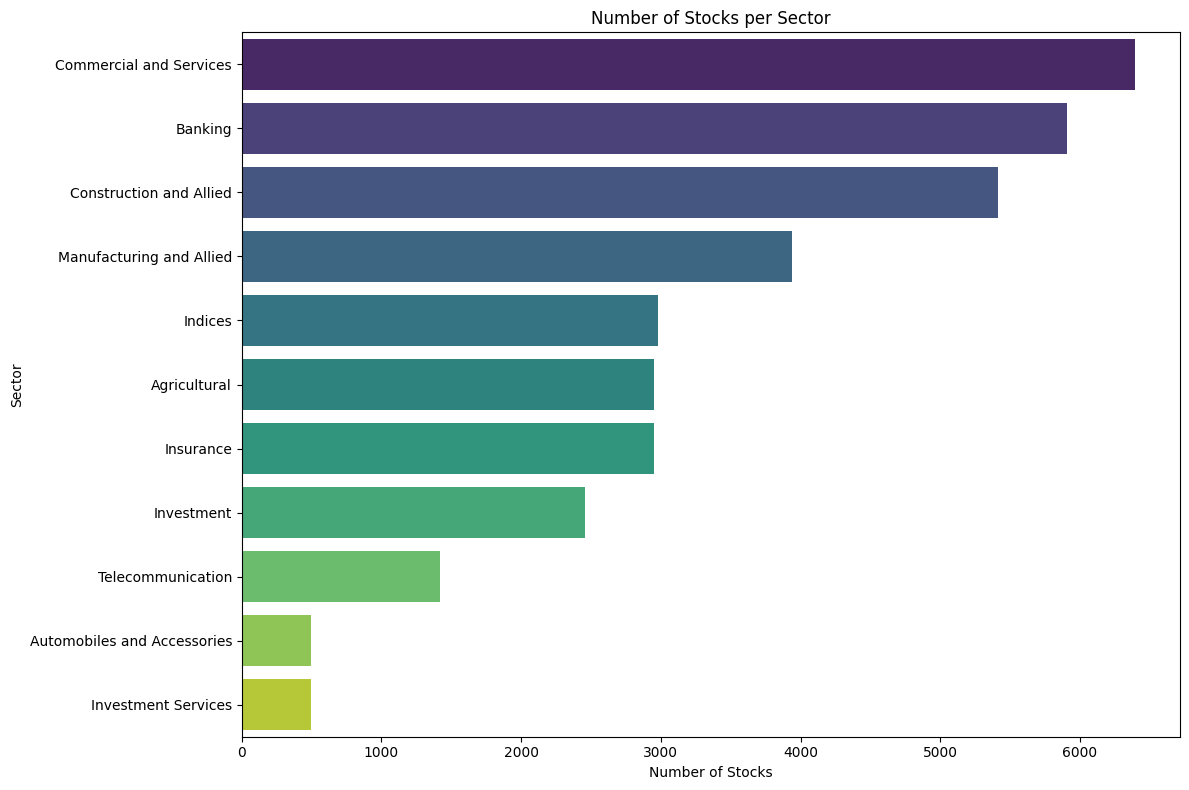

In [27]:
# sectors distribution
plt.figure(figsize=(12, 8))
sector_counts = merged_df['Sector'].value_counts()
sns.barplot(x=sector_counts.values, y=sector_counts.index, hue=sector_counts.index, palette='viridis')
plt.title('Number of Stocks per Sector')
plt.xlabel('Number of Stocks')
plt.ylabel('Sector')
plt.tight_layout()


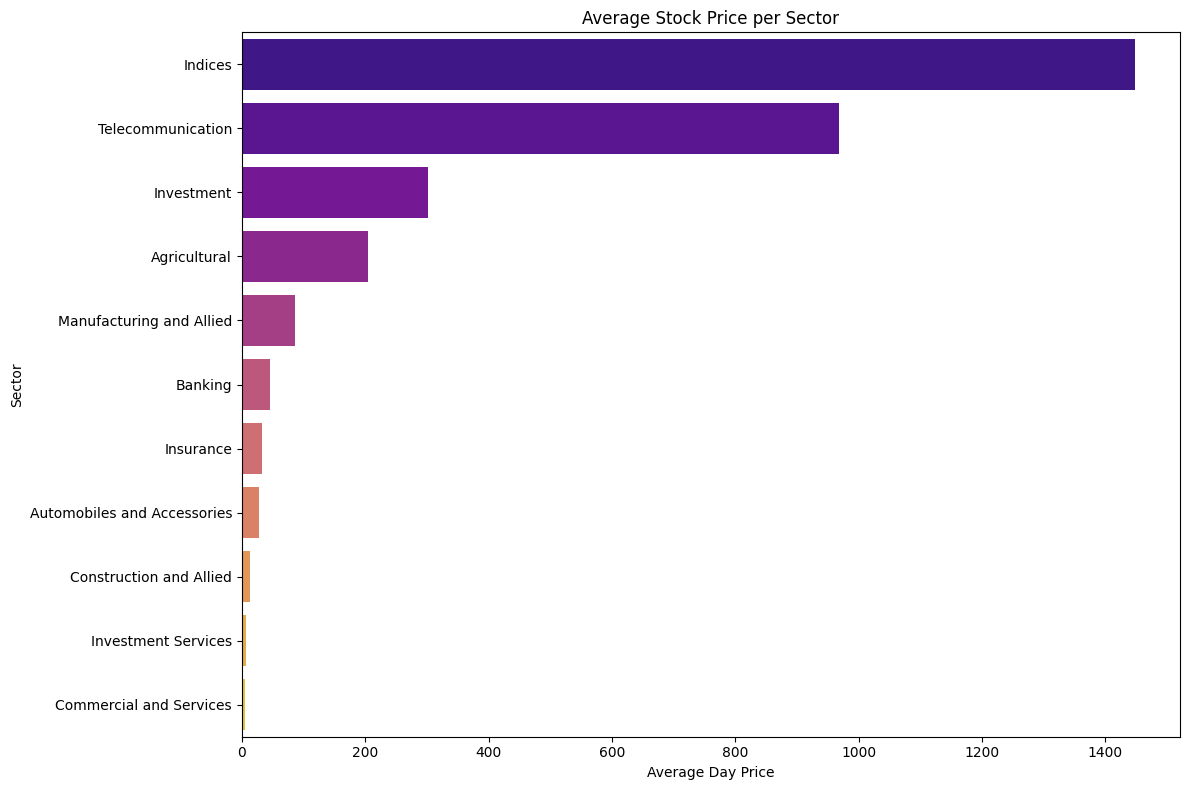

In [28]:
# Sector-wise Average Price
plt.figure(figsize=(12, 8))
sector_avg_price = merged_df.groupby('Sector')['Day Price'].mean().sort_values(ascending=False)
sns.barplot(x=sector_avg_price.values, y=sector_avg_price.index, hue=sector_avg_price.index, palette='plasma')
plt.title('Average Stock Price per Sector')
plt.xlabel('Average Day Price')
plt.ylabel('Sector')
plt.tight_layout()

* Although commercial and services has the highest number of stocks, it is among the lowest average stock prices. This could indicate a sector with many smaller companies or companies with lower individual stock valuations.
* Telecommunication sector has a moderate number of stocks but boasts one of the highest average stock prices suggesting that the companies in this sector are generally more highly valued.

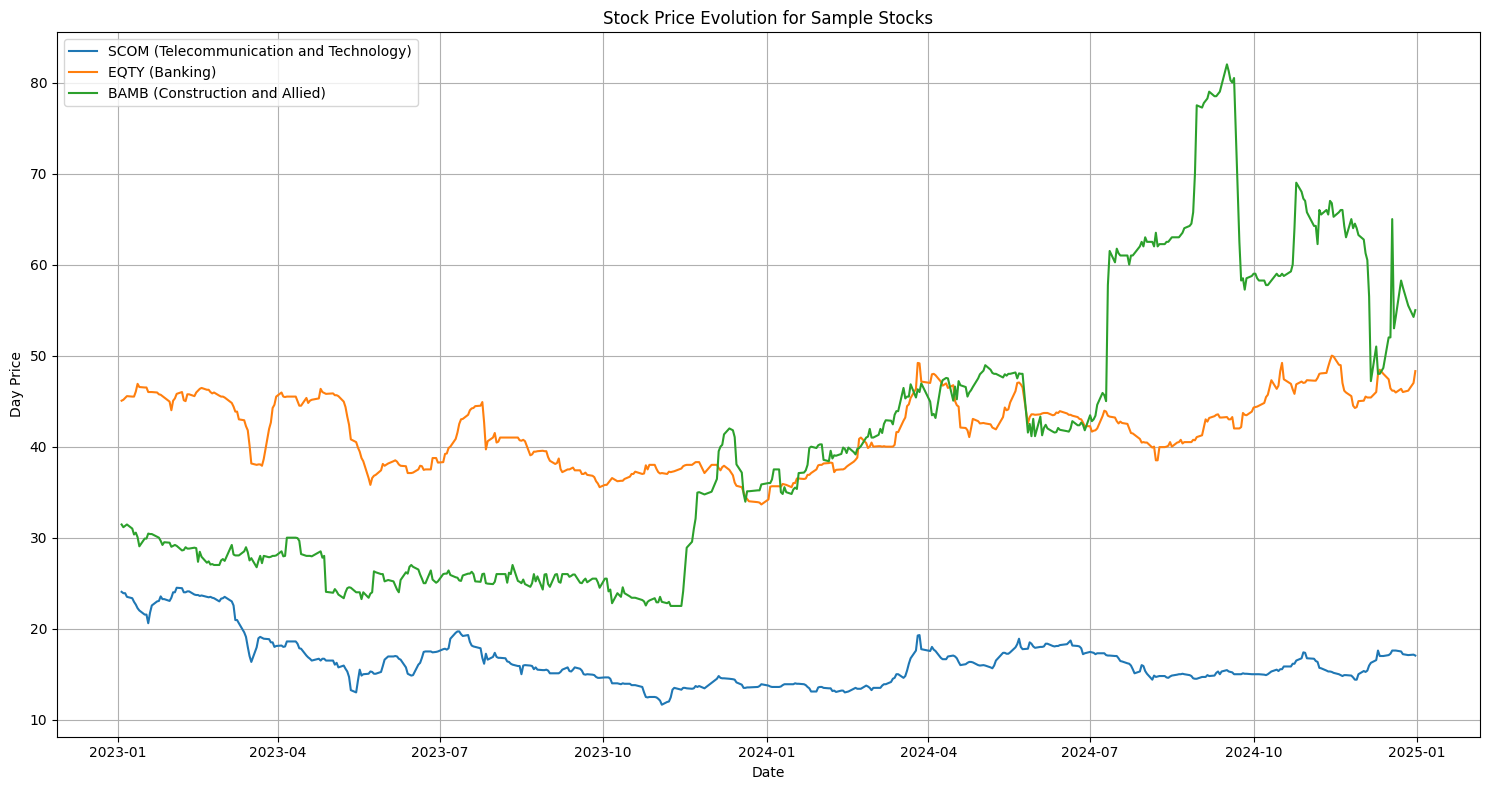

In [29]:
# Stock Price Evolution for Sample Stocks
sample_stocks = {
    'SCOM': 'Telecommunication and Technology',
    'EQTY': 'Banking',
    'BAMB': 'Construction and Allied'
}

plt.figure(figsize=(15, 8))
for code, sector in sample_stocks.items():
    stock_data = merged_df[merged_df['Code'] == code]
    plt.plot(stock_data['Date'], stock_data['Day Price'], label=f'{code} ({sector})')

plt.title('Stock Price Evolution for Sample Stocks')
plt.xlabel('Date')
plt.ylabel('Day Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35393 entries, 0 to 35392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       35393 non-null  datetime64[ns]
 1   Code       35393 non-null  object        
 2   Name       35393 non-null  object        
 3   12m Low    35393 non-null  float64       
 4   12m High   35393 non-null  float64       
 5   Day Low    35393 non-null  float64       
 6   Day High   35393 non-null  float64       
 7   Day Price  35393 non-null  float64       
 8   Previous   35393 non-null  float64       
 9   Change     35393 non-null  float64       
 10  Change%    35393 non-null  float64       
 11  Volume     35393 non-null  float64       
 12  Sector     35393 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 3.5+ MB


In [31]:
merged_df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Sector
0,2023-01-03,EGAD,Eaagads Ltd,10.35,14.5,10.50,10.50,10.50,10.50,1900.0,0.00,1900.0,Agricultural
1,2023-01-03,KUKZ,Kakuzi Plc,342.00,440.0,385.00,385.00,385.00,385.00,0.0,0.00,0.0,Agricultural
2,2023-01-03,KAPC,Kapchorua Tea Kenya Plc,207.00,280.0,115.75,115.75,115.75,113.25,100.0,2.21,100.0,Agricultural
3,2023-01-03,LIMT,Limuru Tea Plc,365.00,380.0,420.00,420.00,420.00,420.00,0.0,0.00,0.0,Agricultural
4,2023-01-03,SASN,Sasini Plc,15.10,22.0,22.00,22.50,22.45,22.45,6900.0,0.00,6900.0,Agricultural


In [51]:
all_stocks = merged_df['Code'].unique()

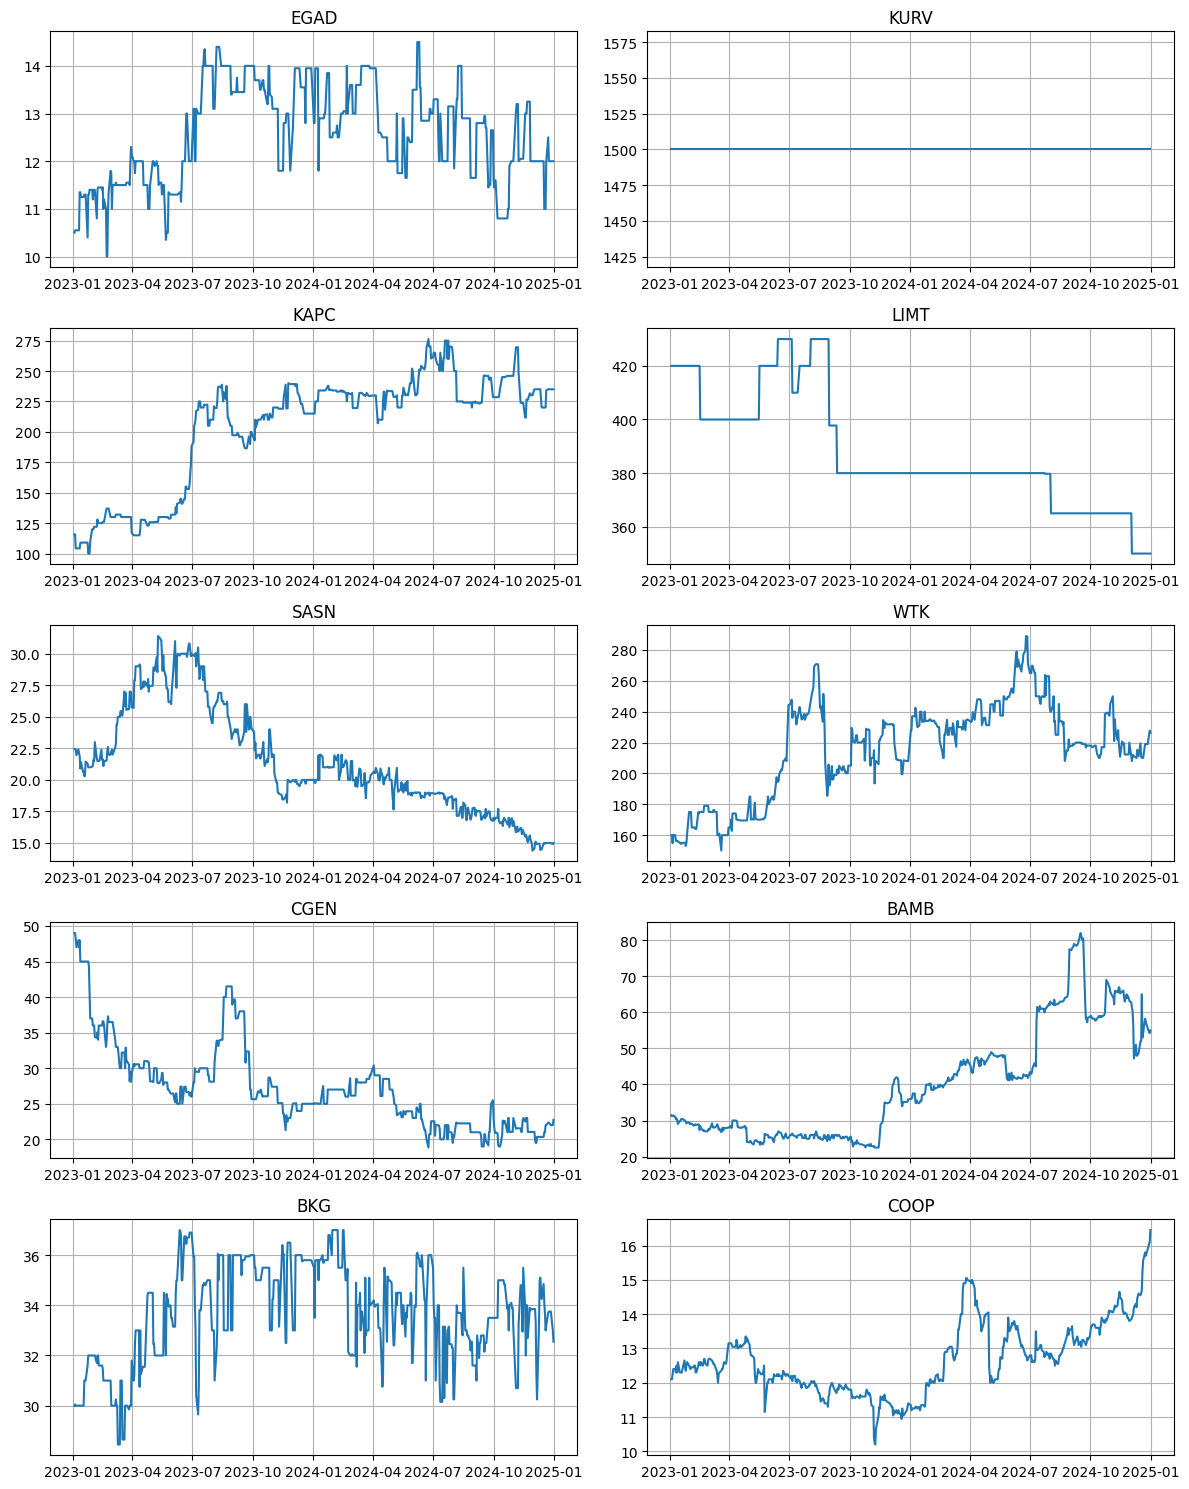

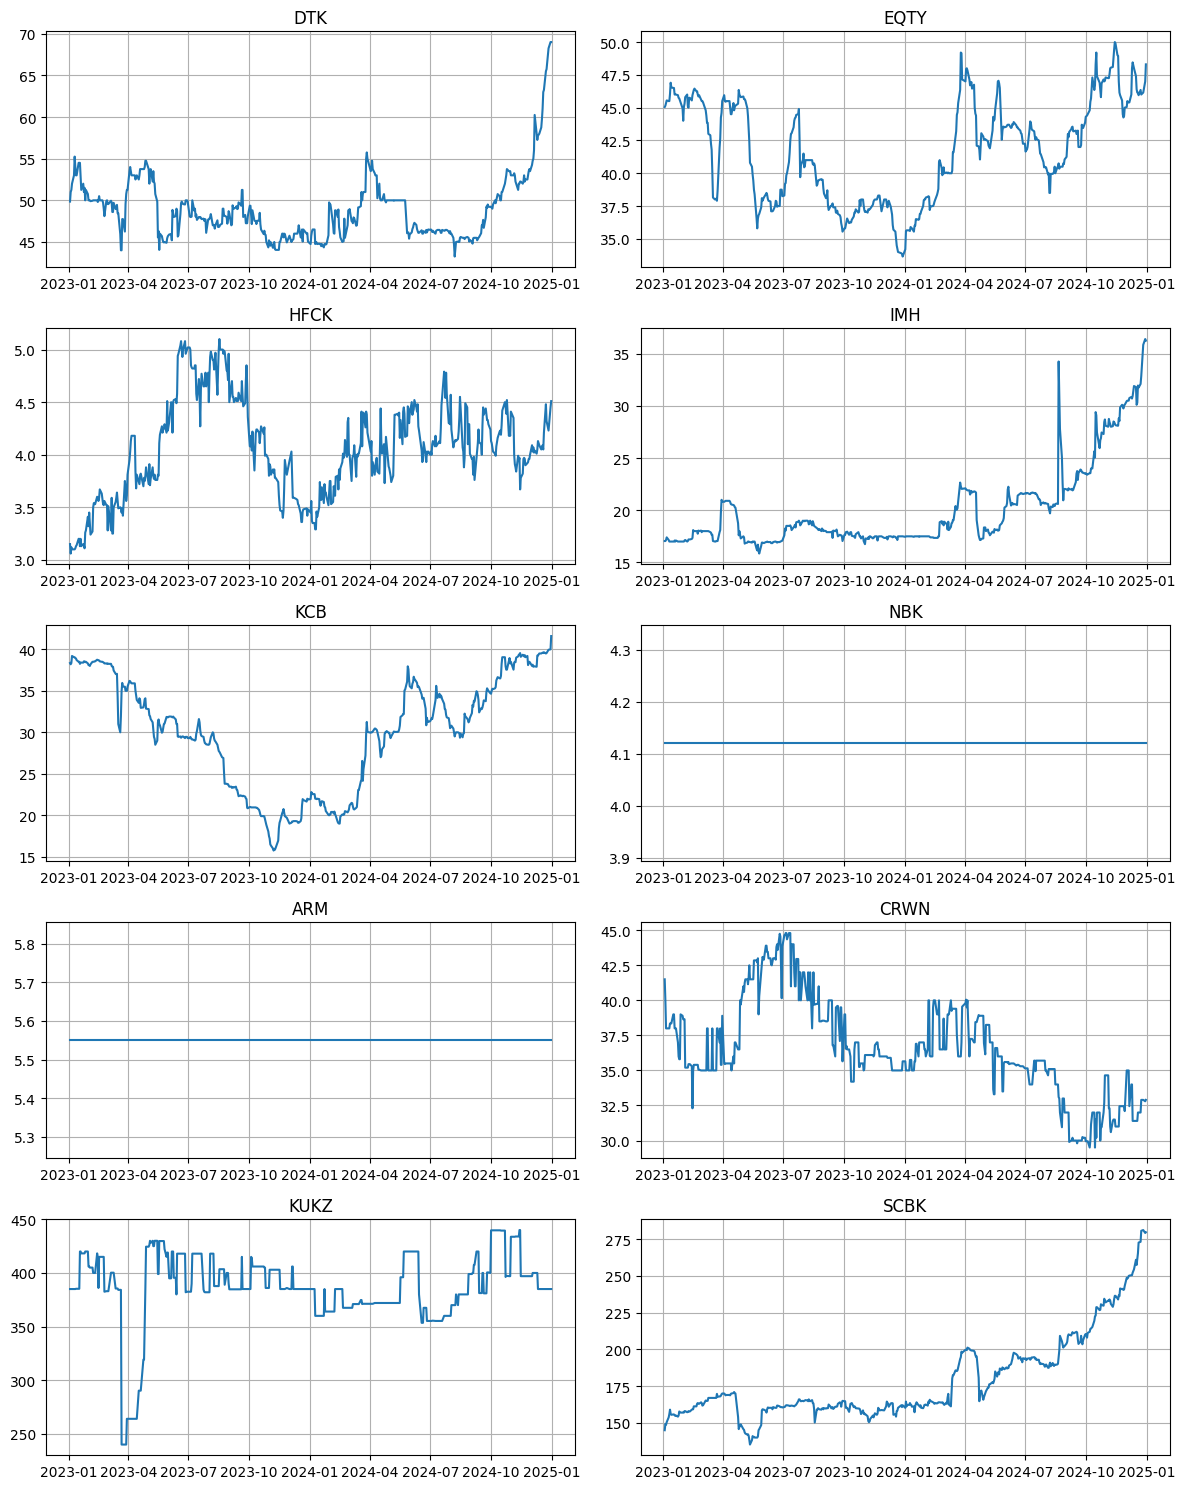

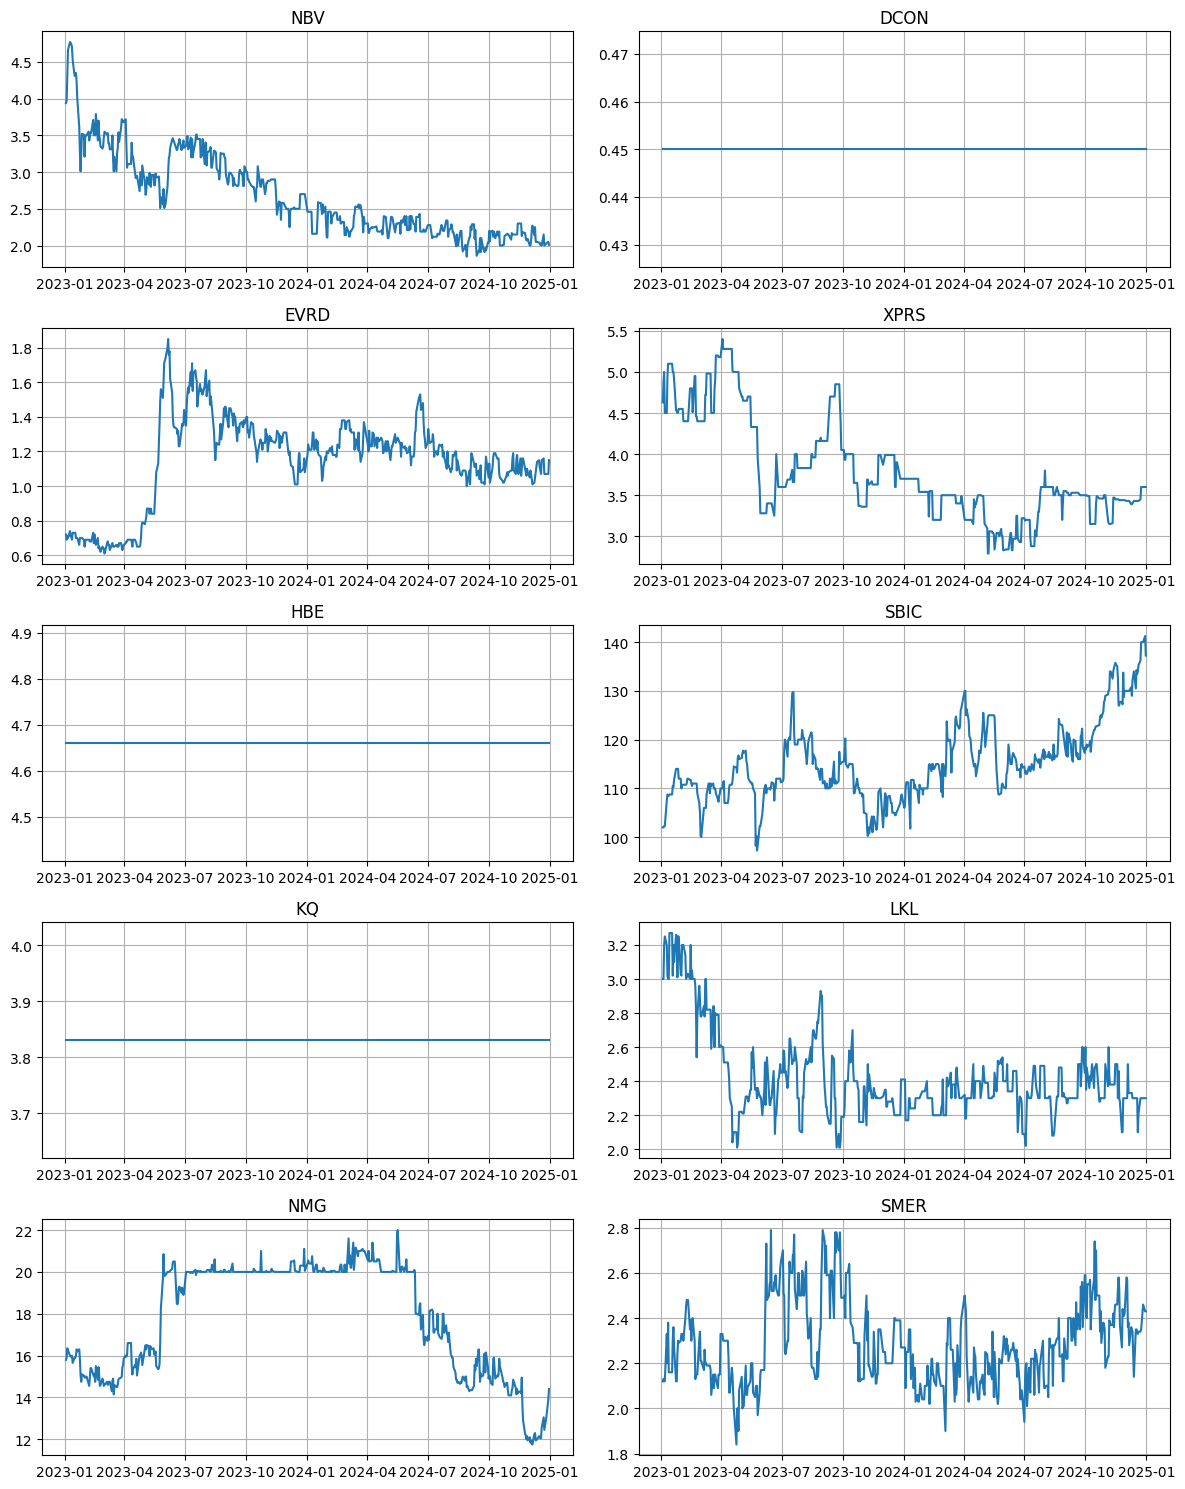

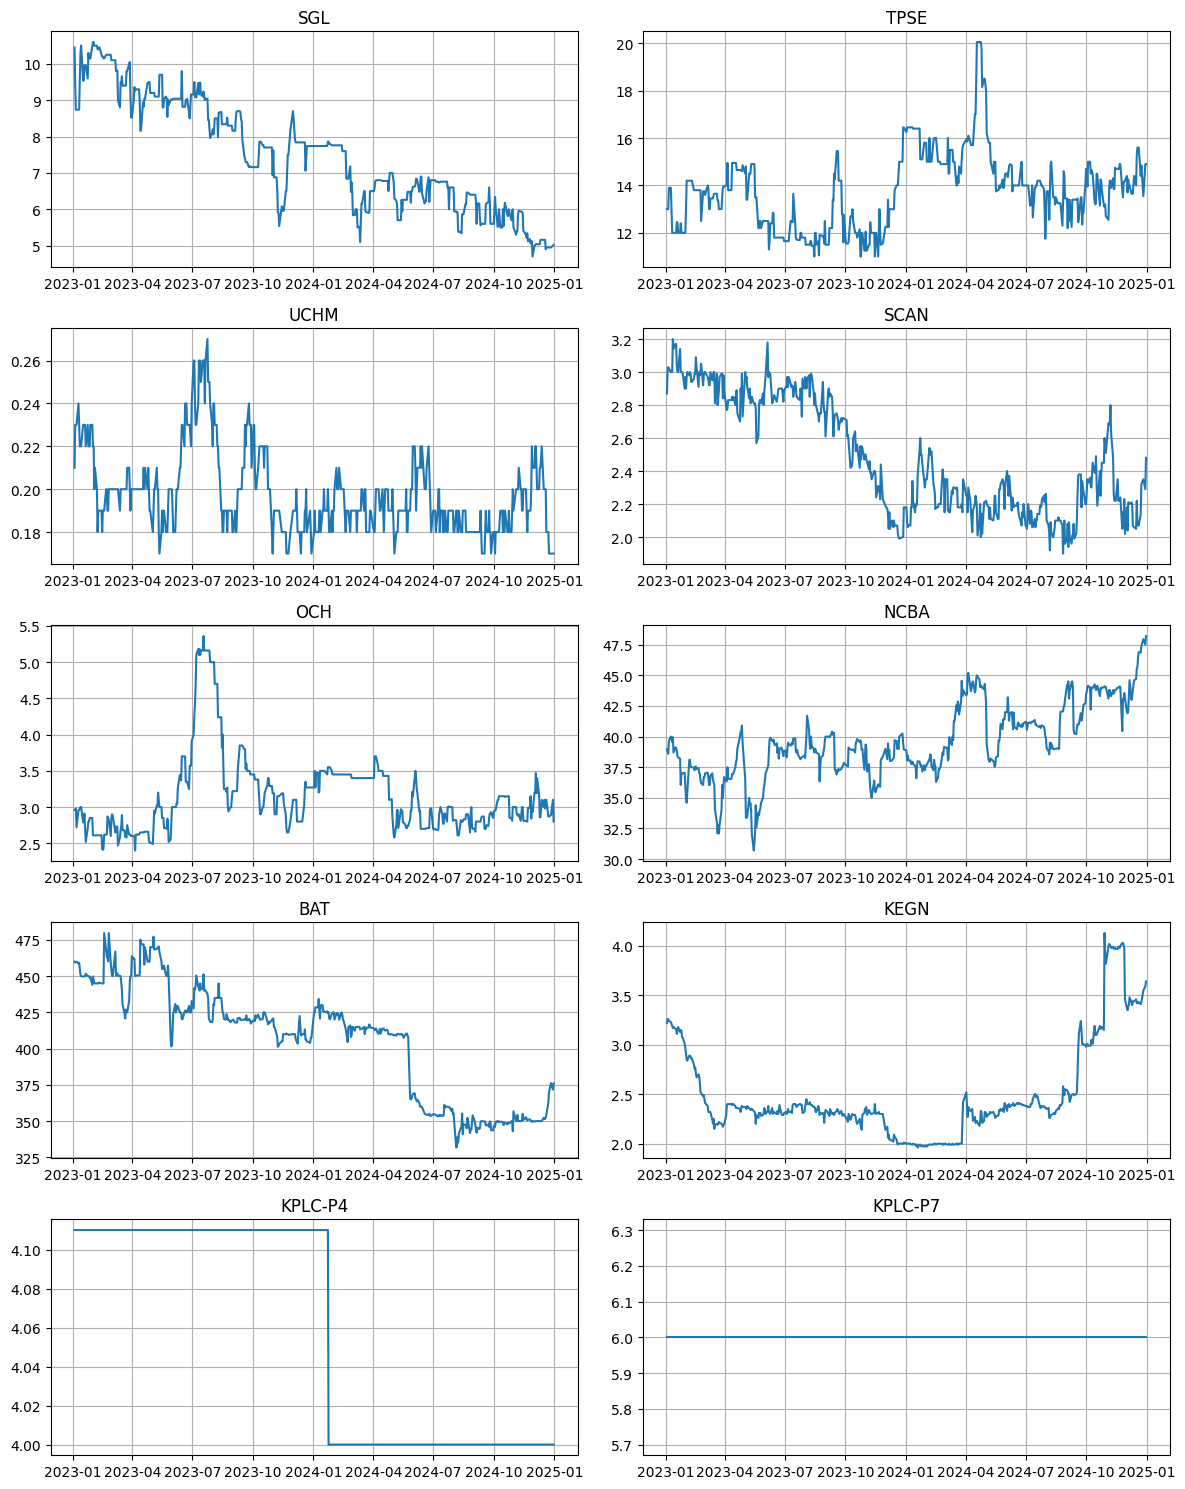

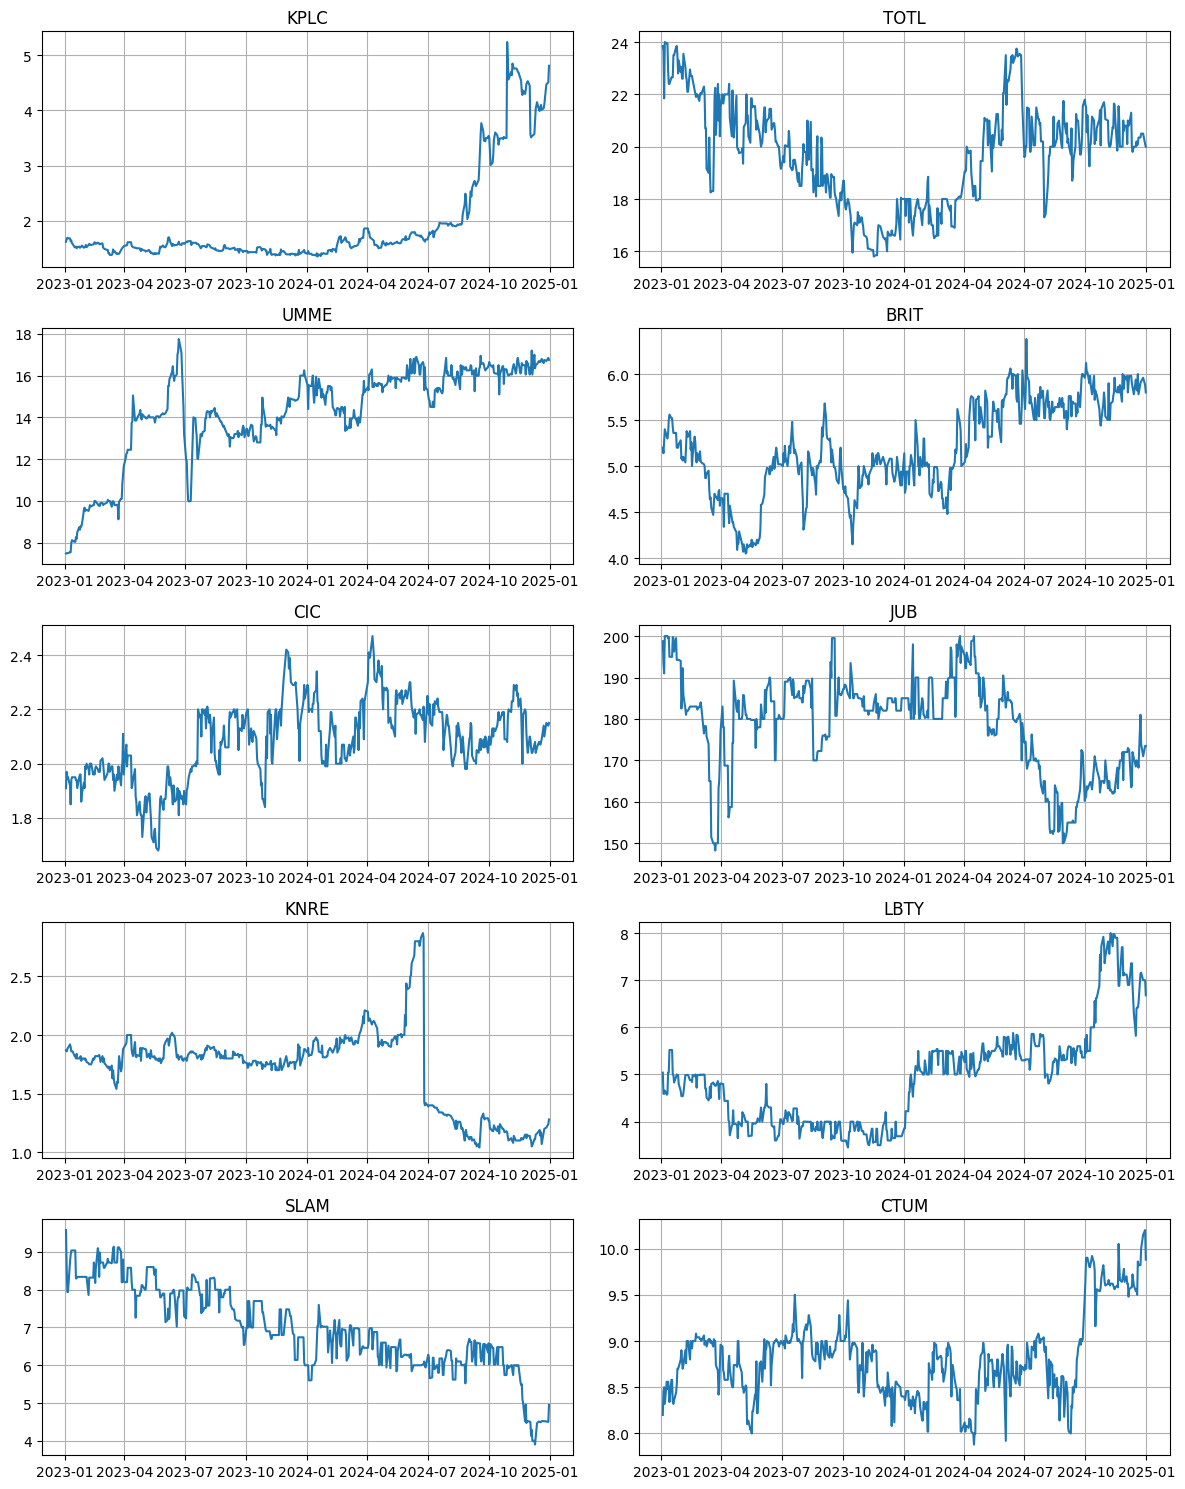

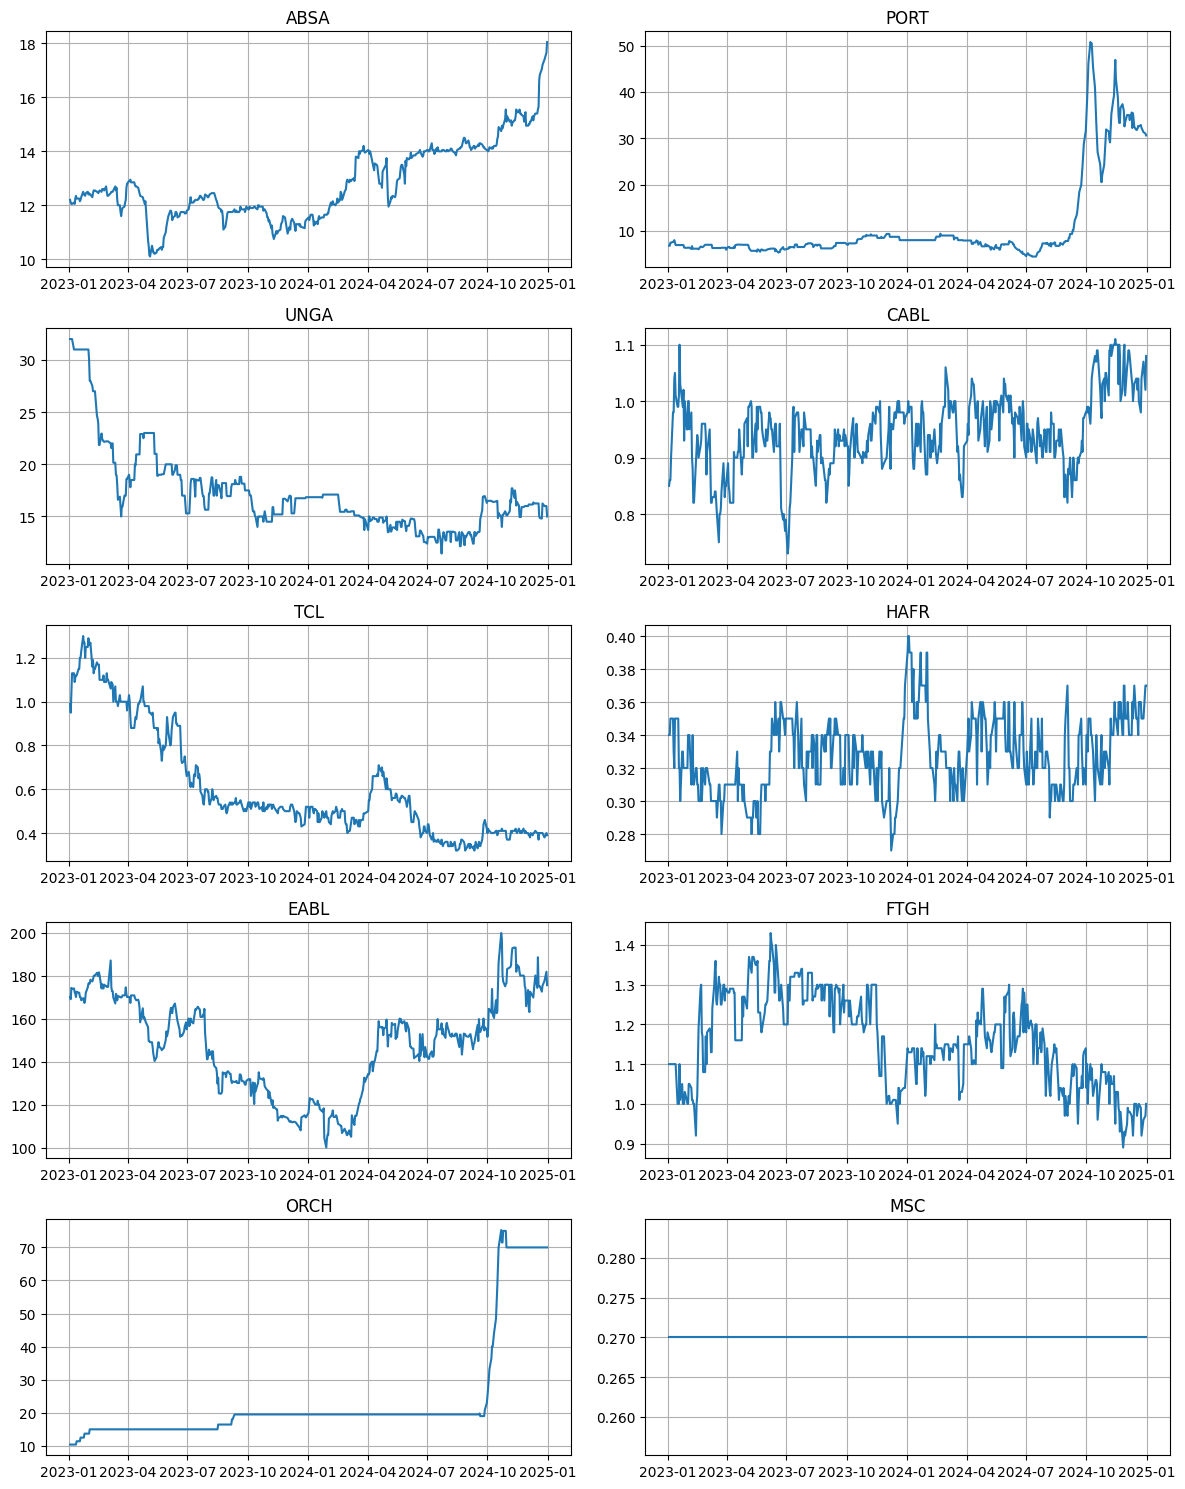

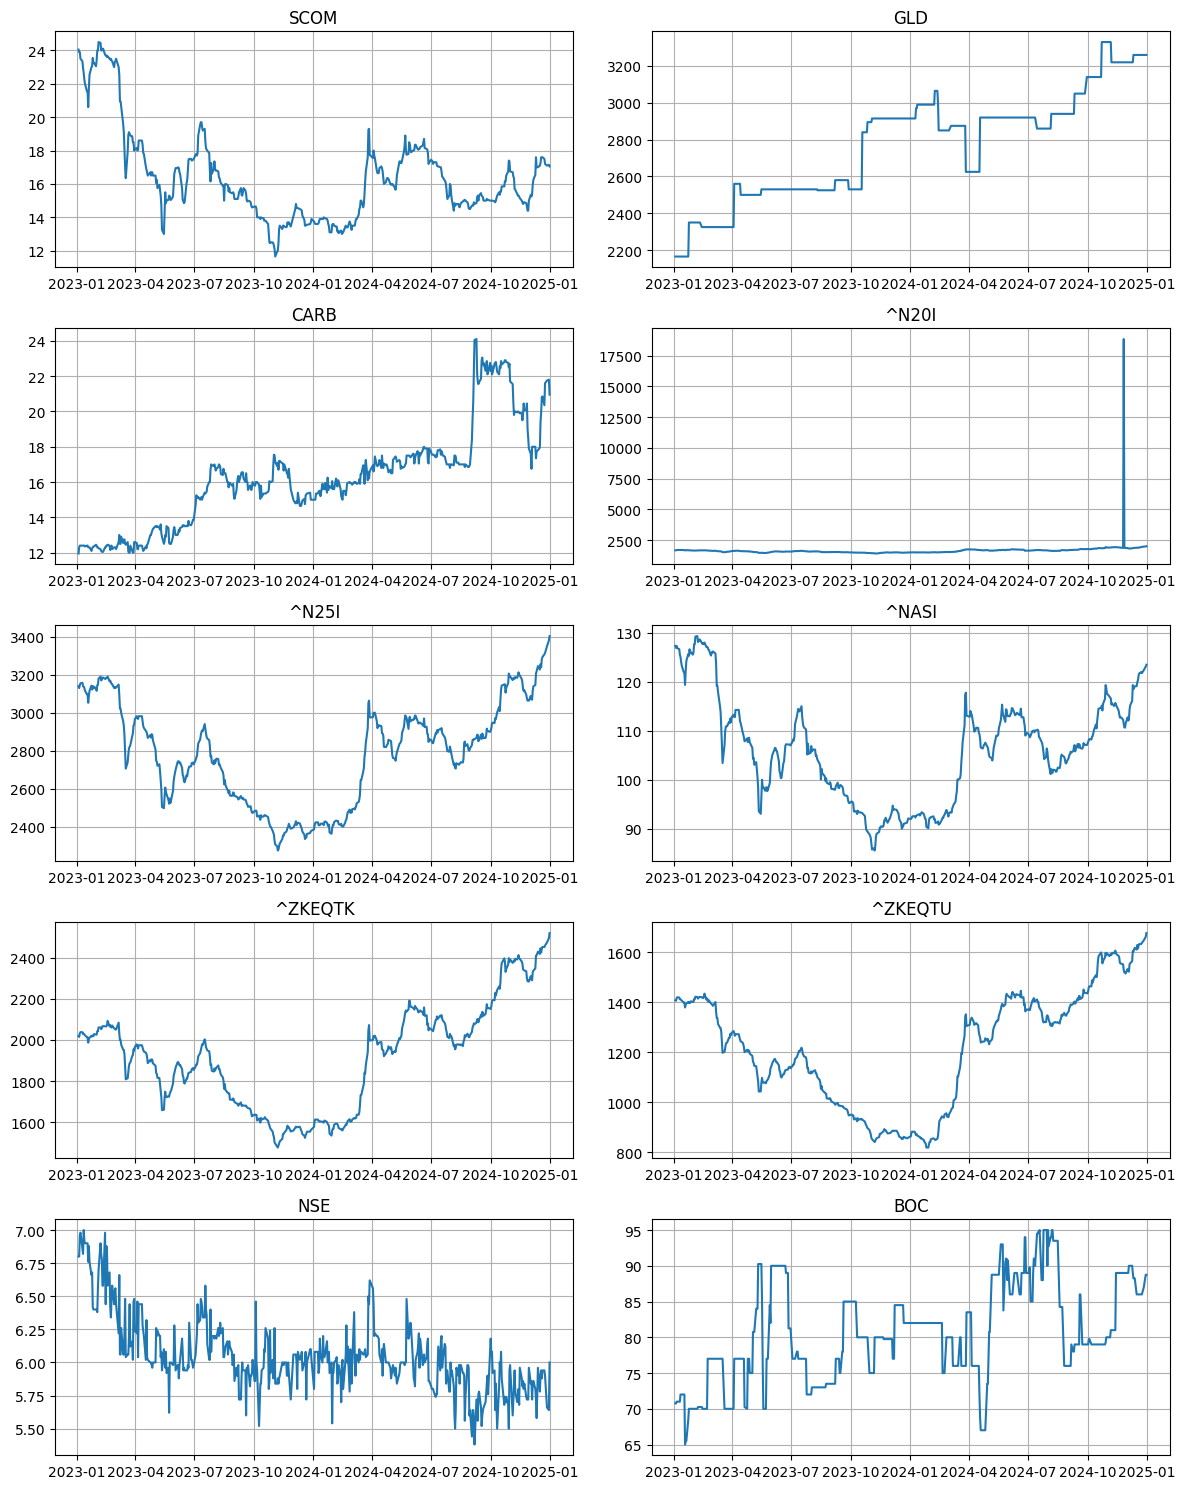

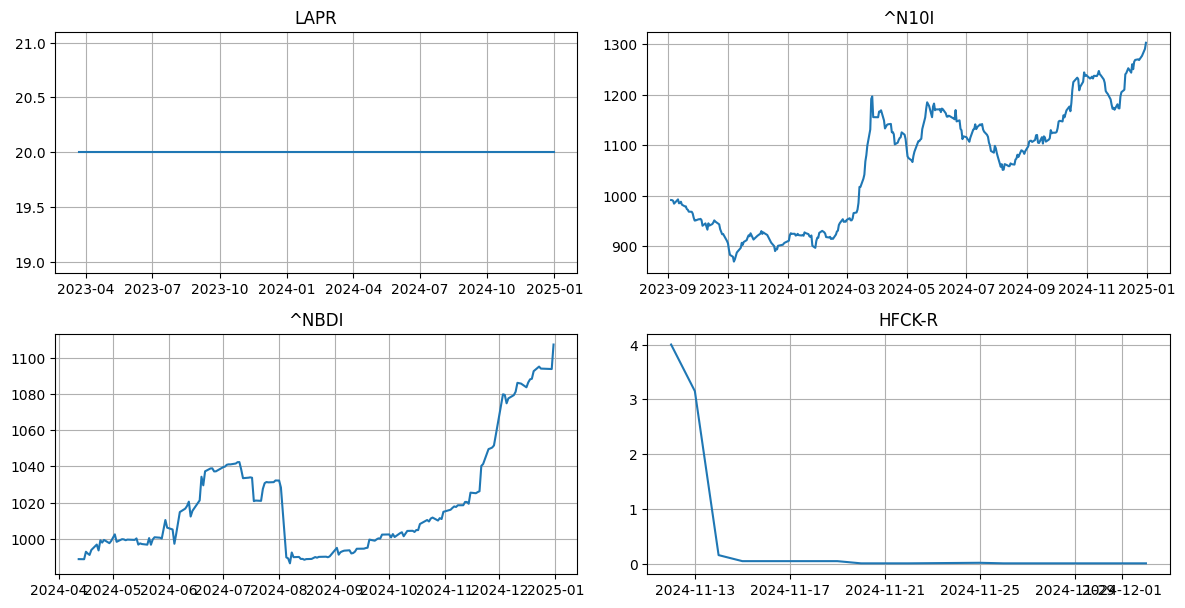

In [58]:
import matplotlib.pyplot as plt

def plot_stocks_as_subplots(df, batch_size=10):
    for i in range(0, len(all_stocks), batch_size):
        batch = all_stocks[i:i+batch_size]
        batch_df = df[df['Code'].isin(batch)]

        fig, axes = plt.subplots(5, 2, figsize=(12, 15))  # 5 rows x 2 cols = 10 subplots
        axes = axes.flatten()

        for ax, stock in zip(axes, batch):
            stock_data = batch_df[batch_df['Code'] == stock]
            ax.plot(stock_data['Date'], stock_data['Day Price'])
            ax.set_title(stock)
            ax.grid(True)

        for j in range(len(batch), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

plot_stocks_as_subplots(merged_df, batch_size=10)
